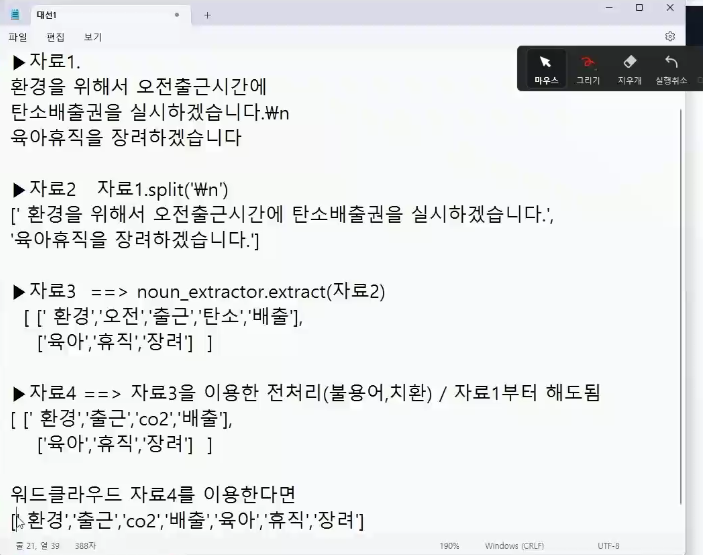

워드클라우드는 무조건 한통(한개의 리스트에 같이 있는 자료로 작업)


    -단어, 빈도수

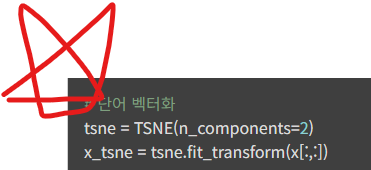



딥러닝에도 사용되는 모듈이다

In [31]:
from konlpy.tag import Okt
import collections
import matplotlib.pyplot as pyplot
from wordcloud import WordCloud
import pandas as pd 

df=pd.read_table('ratings_train.txt')[:1000]
df.head(5)

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [32]:
print(df.isnull().values.any()) # Null 값이 존재하는지 확인
df['document'] = df['document'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣\s]', '', regex=True)

False


<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
C:\Users\USER\AppData\Local\Temp\ipykernel_10652\960976275.py:2: SyntaxWarning: invalid escape sequence '\s'
  df['document'] = df['document'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣\s]', '', regex=True)


In [34]:
from konlpy.tag import Okt 
okt=Okt()
raw='\n'.join(df['document'])
raw
# okt.post(df['document'][0])

'아 더빙 진짜 짜증나네요 목소리\n흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나\n너무재밓었다그래서보는것을추천한다\n교도소 이야기구먼 솔직히 재미는 없다평점 조정\n사이몬페그의 익살스런 연기가 돋보였던 영화스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다\n막 걸음마 뗀 세부터 초등학교 학년생인 살용영화ㅋㅋㅋ별반개도 아까움\n원작의 긴장감을 제대로 살려내지못했다\n별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지정말 발로해도 그것보단 낫겟다 납치감금만반복반복이드라마는 가족도없다 연기못하는사람만모엿네\n액션이 없는데도 재미 있는 몇안되는 영화\n왜케 평점이 낮은건데 꽤 볼만한데 헐리우드식 화려함에만 너무 길들여져 있나\n걍인피니트가짱이다진짜짱이다\n볼때마다 눈물나서 죽겠다년대의 향수자극허진호는 감성절제멜로의 달인이다\n울면서 손들고 횡단보도 건널때 뛰쳐나올뻔 이범수 연기 드럽게못해\n담백하고 깔끔해서 좋다 신문기사로만 보다 보면 자꾸 잊어버린다 그들도 사람이었다는 것을\n취향은 존중한다지만 진짜 내생에 극장에서 본 영화중 가장 노잼 노감동임 스토리도 어거지고 감동도 어거지\nㄱ냥 매번 긴장되고 재밋음ㅠㅠ\n참 사람들 웃긴게 바스코가 이기면 락스코라고 까고바비가 이기면 아이돌이라고 깐다그냥 까고싶어서 안달난것처럼 보인다\n굿바이 레닌 표절인것은 이해하는데 왜 뒤로 갈수록 재미없어지냐\n이건 정말 깨알 캐스팅과 질퍽하지않은 산뜻한 내용구성이 잘 버무러진 깨알일드\n약탈자를 위한 변명 이라 저놈들은 착한놈들 절대 아닌걸요\n나름 심오한 뜻도 있는 듯 그냥 학생이 선생과 놀아나는 영화는 절대 아님\n보면서 웃지 않는 건 불가능하다\n재미없다 지루하고 같은 음식 영화인데도 바베트의 만찬하고 넘 차이남바베트의 만찬은 이야기도 있고 음식 보는재미도 있는데  이건 볼게없다 음식도 별로 안나오고 핀란드 풍경이라도 구경할랫는데 그것도 별로 안나옴 ㅡㅡ\n절대 평범한 영화가 아닌 수작이라는걸 말씀드립니다\n주제는 좋은데 중반부터 지루하다\n다 짤랐을꺼

In [38]:
data_tokens=okt.pos(raw)
name_list=[t[0] for t in data_tokens if t[1]=='Noun' ]
name_list[:5]

['더빙', '진짜', '목소리', '흠', '포스터']

In [47]:
#collections 모듈의 colections.Counter

from nltk import FreqDist
fd_names=FreqDist(name_list)
fd_names # 딕셔너리 구조로 나옴
find_word='배우'
fd_names.N(),fd_names[find_word],fd_names.freq(find_word)*100

(6129, 30, 0.4894762604013705)

In [58]:
import collections
import pandas as pd 
tmp=collections.Counter(name_list)
dict(tmp).keys()

import numpy as np 
total=np.sum(list(dict(tmp).values()))
list(dict(tmp).values())/total
data=pd.DataFrame({'world':dict(tmp).keys(),
            'freq':dict(tmp).values(),
            'rate':list(dict(tmp).values())/total})
data.sort_values('rate',ascending=False)

,world,freq,rate
7,영화,339,0.055311
1,진짜,68,0.011095
45,정말,66,0.010768
10,연기,51,0.008321
175,이,49,0.007995
...,...,...,...
1126,마치,1,0.000163
1125,트리스탄,1,0.000163
1124,랜슬롯,1,0.000163
1121,기사,1,0.000163


In [67]:
# '배우'의 글자 빈도수 출력

import collections 
import pandas as pd 
tmp=collections.Counter(name_list)
tmp['배우']


30

In [68]:
indexNum=list(tmp.keys()).index('배우')
list(tmp.values())[indexNum]

30

https://www.nltk.org/api/nltk.lm.html




https://wikidocs.net/83544

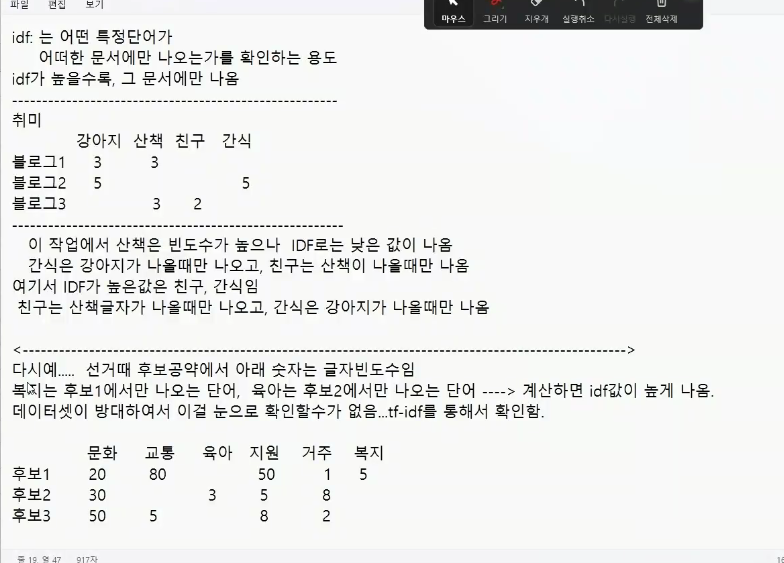